In [1]:
import pandas as pd
import numpy as np

In [3]:
reviews=pd.read_csv(r'C:\Users\work\Documents\womens-ecommerce-clothing-reviews\Womens Clothing E-Commerce Reviews.csv')

In [4]:
reviews.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
reviews.drop(['Unnamed: 0', 'Clothing ID','Age','Title','Recommended IND','Positive Feedback Count','Division Name','Department Name','Class Name'], axis=1, inplace=True)
reviews.head()

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5


In [8]:
reviews.shape

(23486, 2)

In [10]:
reviews.isnull().sum()

Review Text    845
Rating           0
dtype: int64

In [14]:
reviews=reviews.dropna(how='any',axis=0) 

In [15]:
reviews.isnull().sum()

Review Text    0
Rating         0
dtype: int64

In [16]:
reviews.shape

(22641, 2)

In [23]:
rates = reviews.groupby('Rating')
rates.first()

,Review Text
Rating,
1,"3 tags sewn in, 2 small (about 1'' long) and 1..."
2,"I love tracy reese dresses, but this one is no..."
3,I had such high hopes for this dress and reall...
4,Absolutely wonderful - silky and sexy and comf...
5,Love this dress! it's sooo pretty. i happene...


C:\Users\work\AppData\Local\Temp\ipykernel_14924\1668202097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=reviews, x='Rating', palette='viridis')


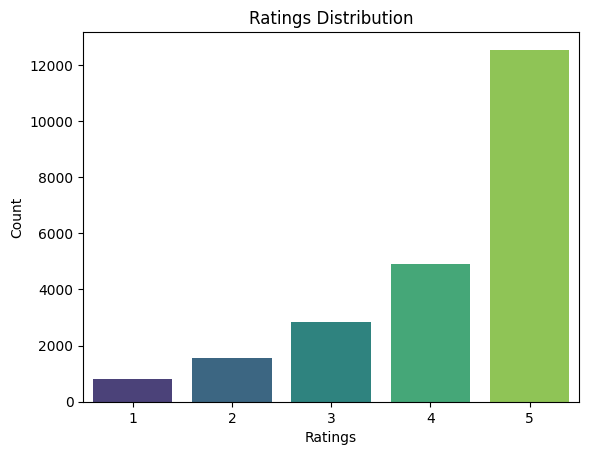

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=reviews, x='Rating', palette='viridis')
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [29]:
reviews['Rating'].value_counts(normalize=True)


Rating
5    0.553862
4    0.216775
3    0.124685
2    0.068416
1    0.036262
Name: proportion, dtype: float64

In [32]:
reviews['review_length'] = reviews['Review Text'].apply(len)
print(reviews['review_length'].describe())

count    22641.000000
mean       308.687911
std        143.940048
min          9.000000
25%        186.000000
50%        301.000000
75%        459.000000
max        508.000000
Name: review_length, dtype: float64


C:\Users\work\AppData\Local\Temp\ipykernel_14924\2376343611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['review_length'] = reviews['Review Text'].apply(len)


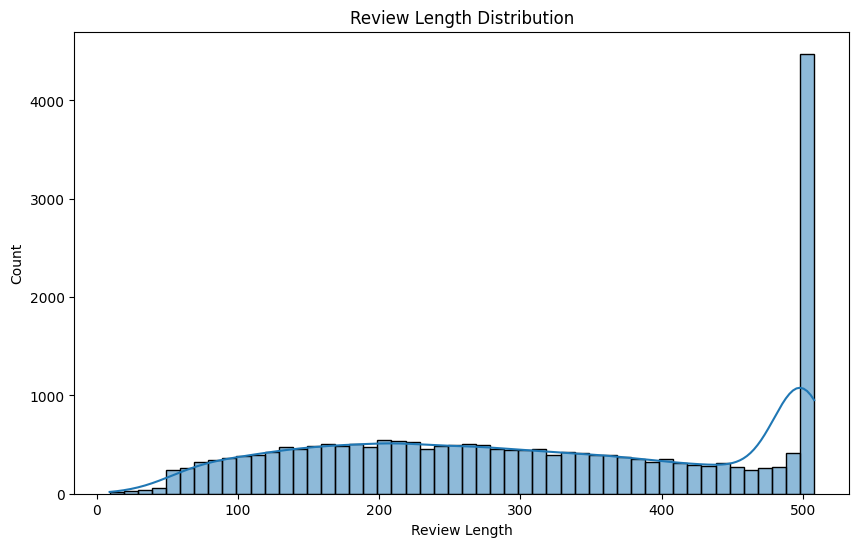

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(reviews['review_length'], bins=50, kde=True)
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.show()


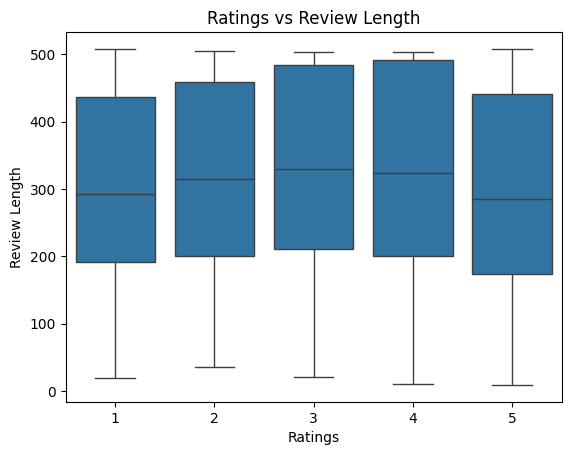

In [34]:
#Analyze the relationship between ratings and review length:

sns.boxplot(data=reviews, x='Rating', y='review_length')
plt.title('Ratings vs Review Length')
plt.xlabel('Ratings')
plt.ylabel('Review Length')
plt.show()


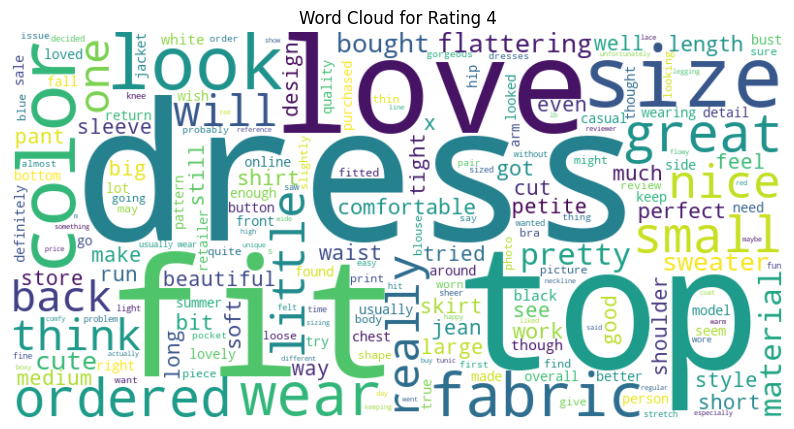

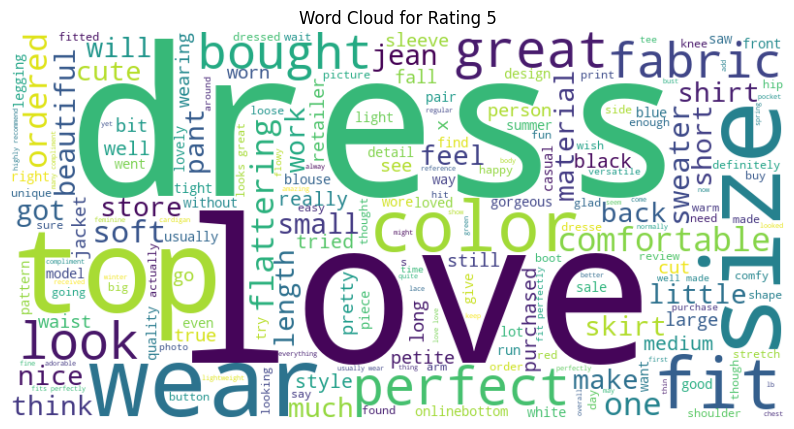

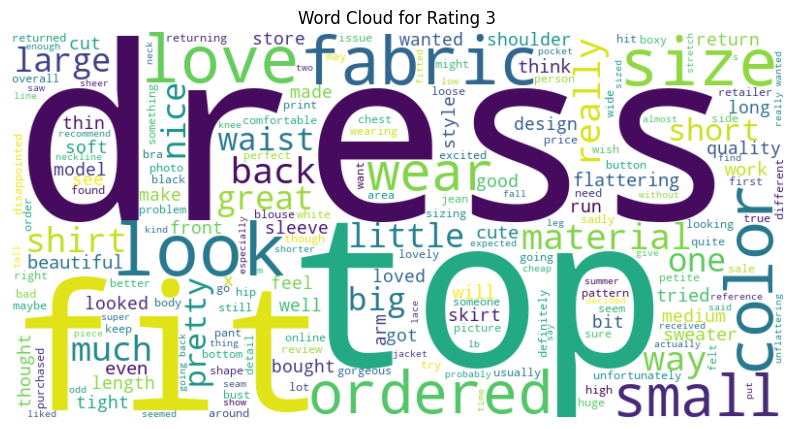

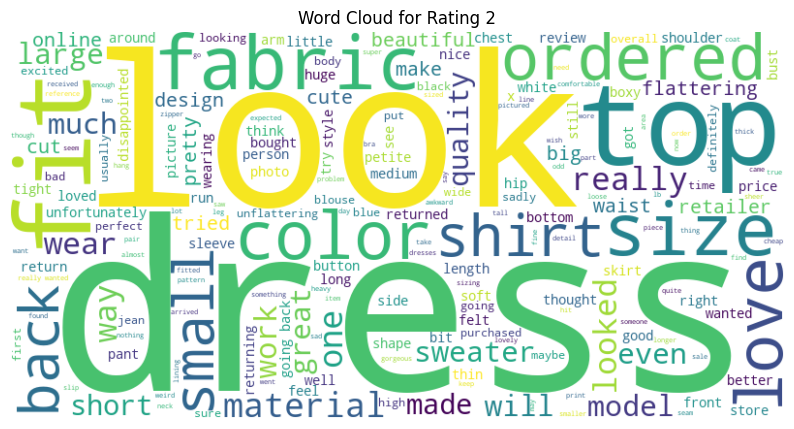

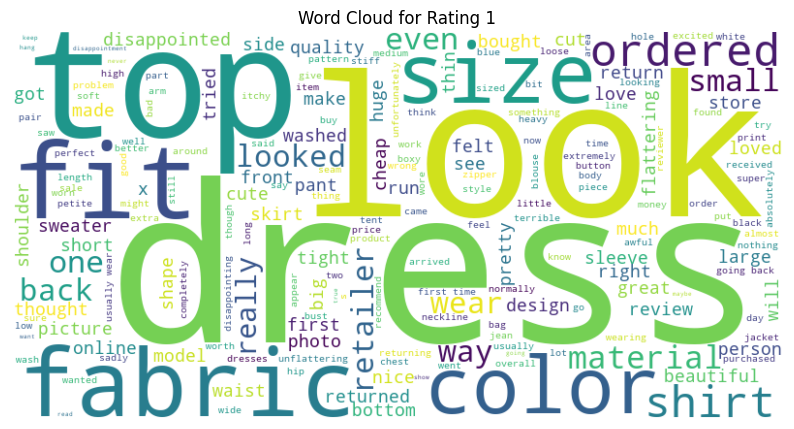

In [37]:
from wordcloud import WordCloud

def plot_wordcloud(data, rating):
    text = ' '.join(data[data['Rating'] == rating]['Review Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Rating {rating}')
    plt.axis('off')
    plt.show()

for r in reviews['Rating'].unique():
    plot_wordcloud(reviews, r)
